# Exploring the Secrets of the Bitcoin Blockchain - Part I

This notebook gives an introduction on how explore the Bitcoin blockchain using the "Chain Explorer" Python package. 

First we import all necessary packages including the Chain Explorer, before we have a look at the point where it all started the Genesis block. This block is also called Block 0 and marks the birth of Bitcoin and everything that followed afterwards including Alt Coins and other decentralized blockchain applications.

In [43]:
import sys
import time
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from chainexplorer import explorer as exp

If we want to understand the secrets of the Blockchain we need one thing first: Data.

There are multiple resources on the internet that allow you to browse the Bitcoin Blockchain. You can also download the entire blockchain to your computer. But what we want here is an easy acces to Bitcoin blockchain data which allows us to process certain aspects directly in Python.

Therefore, the Chain Explorer usese the https://www.blockchain.com/explorer API to selectively retrieve data from the blockchain. This takes away a lot of overhead from us and we can directly start with exploring what data and messages have been stored on the Bitcoin Blockchain.

So let's get to it by downlaoding the Genesis Block.

In [3]:
# Download the Genesis block
raw_block = exp.get_by_block(0)

Now that we have the data of the Genesis Block available we can start exploring it. First let's check the block header which is part of a meta data section that we recieved from the https://www.blockchain.com/explorer API.

The Chain Explorer has a convenience function to print that part as shown below.

In [4]:
# Take a look at the Genesis information
exp.show_block_info(raw_block)

hash: 000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f
ver: 1
prev_block: 0000000000000000000000000000000000000000000000000000000000000000
mrkl_root: 4a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b
time: 1231006505
bits: 486604799
next_block: ['00000000839a8e6886ab5951d76f411475428afc90947ee320161bbf18eb6048']
fee: 0
nonce: 2083236893
n_tx: 1
size: 285
block_index: 0
main_chain: True
height: 0
weight: 1140


As mentioned above the information returned here goes beyond the actual block header which only contains the following parameters:

|Parameter | API name | Description
| --- | --- | --- |
Version | ver | Protocol version
Previous Block | prev_block | Previous block hash
Merkle Root | mrkl_root | Merkle root hash
Timestamp | time | Block creation time
Difficulty target | bits | Difficulty for PoW
Nonce | nonce | Counter for PoW

Nevertheless the extra information is of course welcome. But let's get back to figuring out the Genesis block. First of all we can see that there was no previous block to the Genesis block, it's all zeros. This makes sense as it is the first block ever created. Also we see that the block index is 0 which is why the Genesis block is often also called block 0. We can further see a time parameter. This is the birthday of Bitcoin. But it is not readable for us. In order to get a date out of it we need to convert this timestamp to a datetime as follows. 

In [5]:
b_day = datetime.fromtimestamp(raw_block['time'])

print(f'\nBitcoin was born at: {b_day}\n')


Bitcoin was born at: 2009-01-03 19:15:05



And here we go: `2009-01-03 19:15:05` the exact birth time of Bitcoin!

# Every block is linked to only one previous block

Now before we move on let's have a look at another fundamental property of the Blockchain. Every block is connected to only one previous block. There are no forks or parallel chains. Now that the https://www.blockchain.com/explorer API also returns us the hash of the previous and next block we can use this information to validate this principle.

The code below downloads consecutive blocks starting with the Genesis block and confimring that the following block contains the hash of the current block. Let's have a look.

In [6]:
prev_hash = []
for block in range(10):
    raw_block = exp.get_by_block(block)

    if raw_block['prev_block'] == prev_hash:
        print(f'Block hashes match between block {block} and block {block - 1}:\n'
              f'Hash from block {block - 1}:    {prev_hash}\n'
              f'Reference in block {block}: {raw_block["prev_block"]}\n')
    else:
        print(f'No match between block {block} and {block - 1}')

    prev_hash = raw_block['hash']
    time.sleep(1)

No match between block 0 and -1
Block hashes match between block 1 and block 0:
Hash from block 0:    000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f
Reference in block 1: 000000000019d6689c085ae165831e934ff763ae46a2a6c172b3f1b60a8ce26f

Block hashes match between block 2 and block 1:
Hash from block 1:    00000000839a8e6886ab5951d76f411475428afc90947ee320161bbf18eb6048
Reference in block 2: 00000000839a8e6886ab5951d76f411475428afc90947ee320161bbf18eb6048

Block hashes match between block 3 and block 2:
Hash from block 2:    000000006a625f06636b8bb6ac7b960a8d03705d1ace08b1a19da3fdcc99ddbd
Reference in block 3: 000000006a625f06636b8bb6ac7b960a8d03705d1ace08b1a19da3fdcc99ddbd

Block hashes match between block 4 and block 3:
Hash from block 3:    0000000082b5015589a3fdf2d4baff403e6f0be035a5d9742c1cae6295464449
Reference in block 4: 0000000082b5015589a3fdf2d4baff403e6f0be035a5d9742c1cae6295464449

Block hashes match between block 5 and block 4:
Hash from block 4:    000000

Looks like a match! As we can see from the above the hash of the previous block matches the record in the current block. You can go ahead and check differnt blocks. The result will alwys be the same as this is one of the core properties of the Bitcoin blockchain.

# Decoding input and output scripts

Now in the beginning we briefly mentioned that there are secret messages and other stuff hidden on the blockchain. But how can we find this? Well already the very first block of the blockchain contains such an easter egg. So lets find it!

So far we only looked at the block header. But the main objective of the Bitcoin protocol is to enable payments through  a peer-to-peer network which means there needs to be transaction data somewhere. Also here we can use a convenience function from the Chain Explorer to print out the transaction information in the Genesis block.

In [7]:
# Download the Genesis block again
raw_block = exp.get_by_block(0)

exp.show_transactions(raw_block)



Data of transaction: 0

hash: 4a5e1e4baab89f3a32518a88c31bc87f618f76673e2cc77ab2127b7afdeda33b
ver: 1
vin_sz: 1
vout_sz: 1
size: 204
weight: 816
fee: 0
relayed_by: 0.0.0.0
lock_time: 0
tx_index: 2098408272645986
double_spend: False
time: 1231006505
block_index: 0
block_height: 0
inputs: [{'sequence': 4294967295, 'witness': '', 'script': '04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73', 'index': 0, 'prev_out': {'n': 4294967295, 'script': '', 'spending_outpoints': [{'n': 0, 'tx_index': 2098408272645986}], 'spent': True, 'tx_index': 0, 'type': 0, 'value': 0}}]
out: [{'type': 0, 'spent': False, 'value': 5000000000, 'spending_outpoints': [], 'n': 0, 'tx_index': 2098408272645986, 'script': '4104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac', 'addr': '1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa'}]


As we can see the Genesis Block contains only one transaction which is the coinbase transaction. Coinbase transactions are the transactions that generate new Bitcoins as a reward for the miner. Here the reward was 50 Bitcoins which were send to the wallet address `1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa`. This is the first Bitcoin wallet of Satoshi Nakamoto that recieved the first Bitcoins ever mined. 

Interestingly these 50 Bitcoins are not included in the transaction data base which means they cannot be spent. We can see this by looking at the transaction data.

In [8]:
is_spent = raw_block['tx'][0]['out'][0]['spent']

print(f'\nWere the first 50 Bitcoins spent? {is_spent}\n')


Were the first 50 Bitcoins spent? False



However, to this day people continue to send small amounts of Bitcoin to this address as a thank you to Satoshi. If you want to know the current amount in this original Satoshi wallet just run the following code:

In [9]:
raw_address = exp.get_multi_address('1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa')
balance = raw_address['wallet']['final_balance'] / 10**8

print(f'\nThe Satoshi Nakamoto wallet currently contains {balance} Bitcoins.\n')


The Satoshi Nakamoto wallet currently contains 68.56555938 Bitcoins.



Alright back to our original objective - finding a secret message in the Genesis block. Now that we looked at both the block header and the transactions were is the best spot to hide information. Most of the parameters seem either pre-determined by the Bitcoin protocol or too small to contain much information. The only two fields that hold longer strings of information are the input and output scripts in the transaction part. So lets have a closer look. We can extract these scripts easily through another convenience function from the raw block data as follows.

In [10]:
# Collecting the input and output scripts of the Genesis block
in_script, out_script = exp.collect_messages(raw_block)

print(f'\nInput script:\n {in_script[0]}\n\nOutput script:\n {out_script[0]}\n')


Input script:
 04ffff001d0104455468652054696d65732030332f4a616e2f32303039204368616e63656c6c6f72206f6e206272696e6b206f66207365636f6e64206261696c6f757420666f722062616e6b73

Output script:
 4104678afdb0fe5548271967f1a67130b7105cd6a828e03909a67962e0ea1f61deb649f6bc3f4cef38c4f35504e51ec112de5c384df7ba0b8d578a4c702b6bf11d5fac



OK but what are the scripts for? In brief, the input and output scripts are typically used to check if conditions are met to spend the UTXO (Unspent Transaction Outputs). We do not need to dig deeper into the details of the Bitcoin script language here. The important thing is that we identified two parameters that are of reasonable size to contain a secret message. The question is how can we decode it?

The etwo scripts in the Genesis coinbase transaction as shown above are in HEX encoding which apperantly is tricky to read for humans. So let's change the encoding to ASCII. In the Chain Explorer package there is a function to do exactly this as shown below on the example of the output script.

In [11]:
decoded_out_script = exp.decode_hex_message(out_script)

print(f'\nThis is the decoded output script from the Genesis coinbase transaction:\n\n{decoded_out_script[0]}\n')


This is the decoded output script from the Genesis coinbase transaction:

b"A\x04g\x8a\xfd\xb0\xfeUH'\x19g\xf1\xa6q0\xb7\x10\\\xd6\xa8(\xe09\t\xa6yb\xe0\xea\x1fa\xde\xb6I\xf6\xbc?L\xef8\xc4\xf3U\x04\xe5\x1e\xc1\x12\xde\\8M\xf7\xba\x0b\x8dW\x8aLp+k\xf1\x1d_\xac"



Well... if there is a message in the output script it hides itself pretty well. Let's try the input script.

In [12]:
decoded_in_script = exp.decode_hex_message(in_script)

print(f'\nThis is the decoded input script from the Genesis coinbase transaction:\n\n{decoded_in_script[0]}\n')


This is the decoded input script from the Genesis coinbase transaction:

b'\x04\xff\xff\x00\x1d\x01\x04EThe Times 03/Jan/2009 Chancellor on brink of second bailout for banks'



Now, this looks interesting! The beginning is obviously meaningless but then we see the following in the decoded input script:

 
__The Times 03/Jan/2009 Chancellor on brink of second bailout for banks__
 
That looks like a message. And it refers to the front page of the newspaper Times from January 3, 2009. But wait, isn't January 3, 2009 also the day the Genesis block was mined. Indeed it is and this message links the both together. Below is an image of the Times frontpage from that day. 

<br>
<div>
<img src="../images/times_cover.png" width="300"/>
</div>
<br>

Alright, so we found the secret message and its relationship to the Times front cover on the birthday of Bitcoin!

## Congrats! You just uncovered the first secret of the Bitcoin blockchain!

If you want to get whole thing a bit cleaner you can also remove the first 8 bytes from the input script.

In [13]:
clean_message = exp.decode_hex_message(in_script[0][16:])

print(f'\nThis is the cleaned, decoded input script from the Genesis coinbase transaction:\n\n{clean_message[0]}\n')


This is the cleaned, decoded input script from the Genesis coinbase transaction:

b'The Times 03/Jan/2009 Chancellor on brink of second bailout for banks'



# What else can we learn from the Genesis block?

We already learned a lot from the Genesis block but there are some additional question we might want to look at. For example we already recognized that the 50 Bitcoins from the coinbase transaction were never spent. Also due to the fact that the Genesis block is the first block in the blockchain and no Bitcoins or parent block existed at the time there could not have been any transaction besides the coinbase transaction. But when did the first transaction happen? Did Satoshi send some Bitcoins to himself? Let's see if we can find the first block that contains a transaction besides the coinbase transaction.

In [20]:
# This will take a moment since we start at block 0 and wait 1 second before moving on to the next block. 
# The waiting time is necessary to not get blocked by the  https://www.blockchain.com/explorer API.

block = 0
raw_block = exp.get_by_block(block)

while len(raw_block['tx']) == 1:
    # print(f'Checking block {block}') # Activate this if you want to see at which block we are
    raw_block = exp.get_by_block(block)
    block += 1
    
    time.sleep(1)

print(f'\nThe first transaction happened in block {block - 1}\n')


The first transaction happened in block 170



OK, we found it! So block 170 contains the first transaction. And indeed this was the first time that Satoshi send Bitcoins to someone else. Who was it? His name was Hal Finney who was the second person to run Bitcoin as he announced in his famous Tweet on January 11, 2009.

<br>
<div>
<img src="../images/halfin_running_bitcoin.png" width="800"/>
</div>
<br>

So let's have a closer look at this block.

In [14]:
raw_block = exp.get_by_block(170)

exp.show_block_info(raw_block)

t_day = datetime.fromtimestamp(raw_block['time'])
print(f'\nBlock 170 contains the first Bitcoin transaction and was created {t_day}')

value = raw_block['tx'][1]['out'][0]['value'] / 10**8
print(f'The amount send to the wallet were {value} Bitcoins.\n')

hash: 00000000d1145790a8694403d4063f323d499e655c83426834d4ce2f8dd4a2ee
ver: 1
prev_block: 000000002a22cfee1f2c846adbd12b3e183d4f97683f85dad08a79780a84bd55
mrkl_root: 7dac2c5666815c17a3b36427de37bb9d2e2c5ccec3f8633eb91a4205cb4c10ff
time: 1231731025
bits: 486604799
next_block: ['00000000c9ec538cab7f38ef9c67a95742f56ab07b0a37c5be6b02808dbfb4e0']
fee: 0
nonce: 1889418792
n_tx: 2
size: 490
block_index: 170
main_chain: True
height: 170
weight: 1960

Block 170 contains the first Bitcoin transaction and was created 2009-01-12 04:30:25
The amount send to the wallet were 10.0 Bitcoins.



But wait, something seems off here. Let's have another look at the timeline:

Hal Finney starts running Bitcoin on January 11, 2009. 
One day later on January 12, 2009 he recieves the first Bitcoins from Satoshi. 
Before we saw that the first block was created on January 3, 2009. 
So it took 8 days from the Genesis block to the first transaction in block 170.

The average block time, the time between two consequtive blocks, in the Bitcoin protocal is on average 10 minutes. So it is sometimes a little less than 10 minutes and sometimes a little more. Let's confirm this before we move on.

In [41]:
raw_block_169 = exp.get_by_block(169)
raw_block_170 = exp.get_by_block(170)

time_between = round((raw_block_170['time'] - raw_block_169['time']) / 60, 2)

print(f'\nThe time between block 169 and block 170 was {time_between} minutes\n')


The time between block 169 and block 170 was 8.37 minutes



OK not exactly 10 minutes but in the range of 10 minutes. So if to get from block 0 to block 170 should take around 28 hours, or 1 day and 4 hours. But instead it took 8 days. How can this be?

Let's have another look at the beginning of the blockchain.

In [16]:
raw_block_0 = exp.get_by_block(0)
raw_block_1 = exp.get_by_block(1)

time_between = (raw_block_1['time'] - raw_block_0['time']) / 3600 / 24

date_0 = datetime.fromtimestamp(raw_block_0['time'])
date_1 = datetime.fromtimestamp(raw_block_1['time'])

print(f'\nThe time between block 0 and block 1 was {time_between} days\n\n\
The Genesis block was created         {date_0}\nwhile the following block was created {date_1}')


The time between block 0 and block 1 was 5.360648148148148 days

The Genesis block was created         2009-01-03 19:15:05
while the following block was created 2009-01-09 03:54:25


This is odd but apperently it is also what happened. After Satoshi created the Genesis block he did not create another block for six days. This explains the offset that we see between the Genesis block and the time Hal Finney recieved the first Bitcoin transaction in block 170.

Why Satoshi waited for six days before he created the next block is not known. Some say it is a biblical reference since it took God six days to create the earth. Most likely we will never know the real reason.

We can further check the timeline by collecting all the 250 first blocks.

In [46]:
# This will take a moment since we start at block 0 and wait 1 second before moving on to the next block. 
# The waiting time is necessary to not get blocked by the  https://www.blockchain.com/explorer API.

date = []

for block in range(251):
    raw_block = exp.get_by_block(block)
    date.append(raw_block['time'])    
    time.sleep(1)

So now that we collected all the block times let us check the median block time. As noted before it should be around 10 minutes

In [45]:
block_time = np.diff(date) / 60
n_blocks = len(block_time)
median_time = round(np.median(block_time), 2)

print(f'The median block time during the first {n_blocks} blocks was {median_time} minutes.')

The median block time during the first 249 blocks was 11.03 minutes.


So the median time in the first blocks is more than the expected 10 minutes but not too far away. To see where we have the biggest deviations let's just plot the block times vs. the block number.

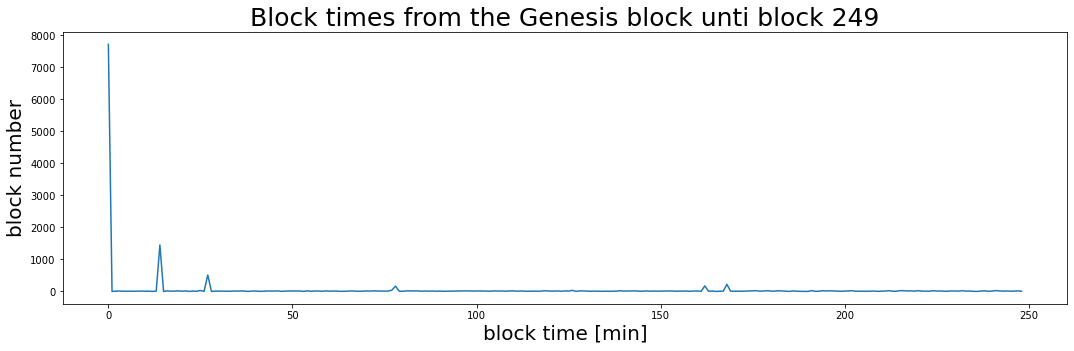

In [39]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

ax.plot(block_time)
ax.set_title(f'Block times from the Genesis block unti block {n_blocks}', fontsize=25)
ax.set_xlabel('block time [min]', fontsize=20)
ax.set_ylabel('block number', fontsize=20)

plt.show()

Looks like there were some occasional hickups in the beginning of the protocoll but after around block 180 things stabelized.